In [1]:
# !pip install pandas
# !pip install numpy

In [2]:
import pandas as pd
import numpy as np

In [3]:
data  = pd.read_csv(r"car data.csv")
data.drop('Car_Name',axis= 1, inplace = True)
data.head()


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data["Current Year"] = 2020
data["Years Old"] = data["Current Year"] - data["Year"]

In [5]:
data.head()


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,Years Old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [6]:
data.drop(['Year',"Current Year"],axis= 1, inplace = True)
data.head()


,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years Old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [7]:
print(data["Transmission"].unique())
print(data["Seller_Type"].unique())
print(data["Owner"].unique())

['Manual' 'Automatic']
['Dealer' 'Individual']
[0 1 3]


In [8]:
print(data["Transmission"].value_counts())
print(data["Seller_Type"].value_counts())
print(data["Owner"].value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
0    290
1     10
3      1
Name: Owner, dtype: int64


In [9]:
# coverting categorical data
data.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Years Old'],
      dtype='object')

In [10]:
data = pd.get_dummies(data,drop_first=True)
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [11]:
data.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Years Old',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

In [12]:
data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Years Old,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


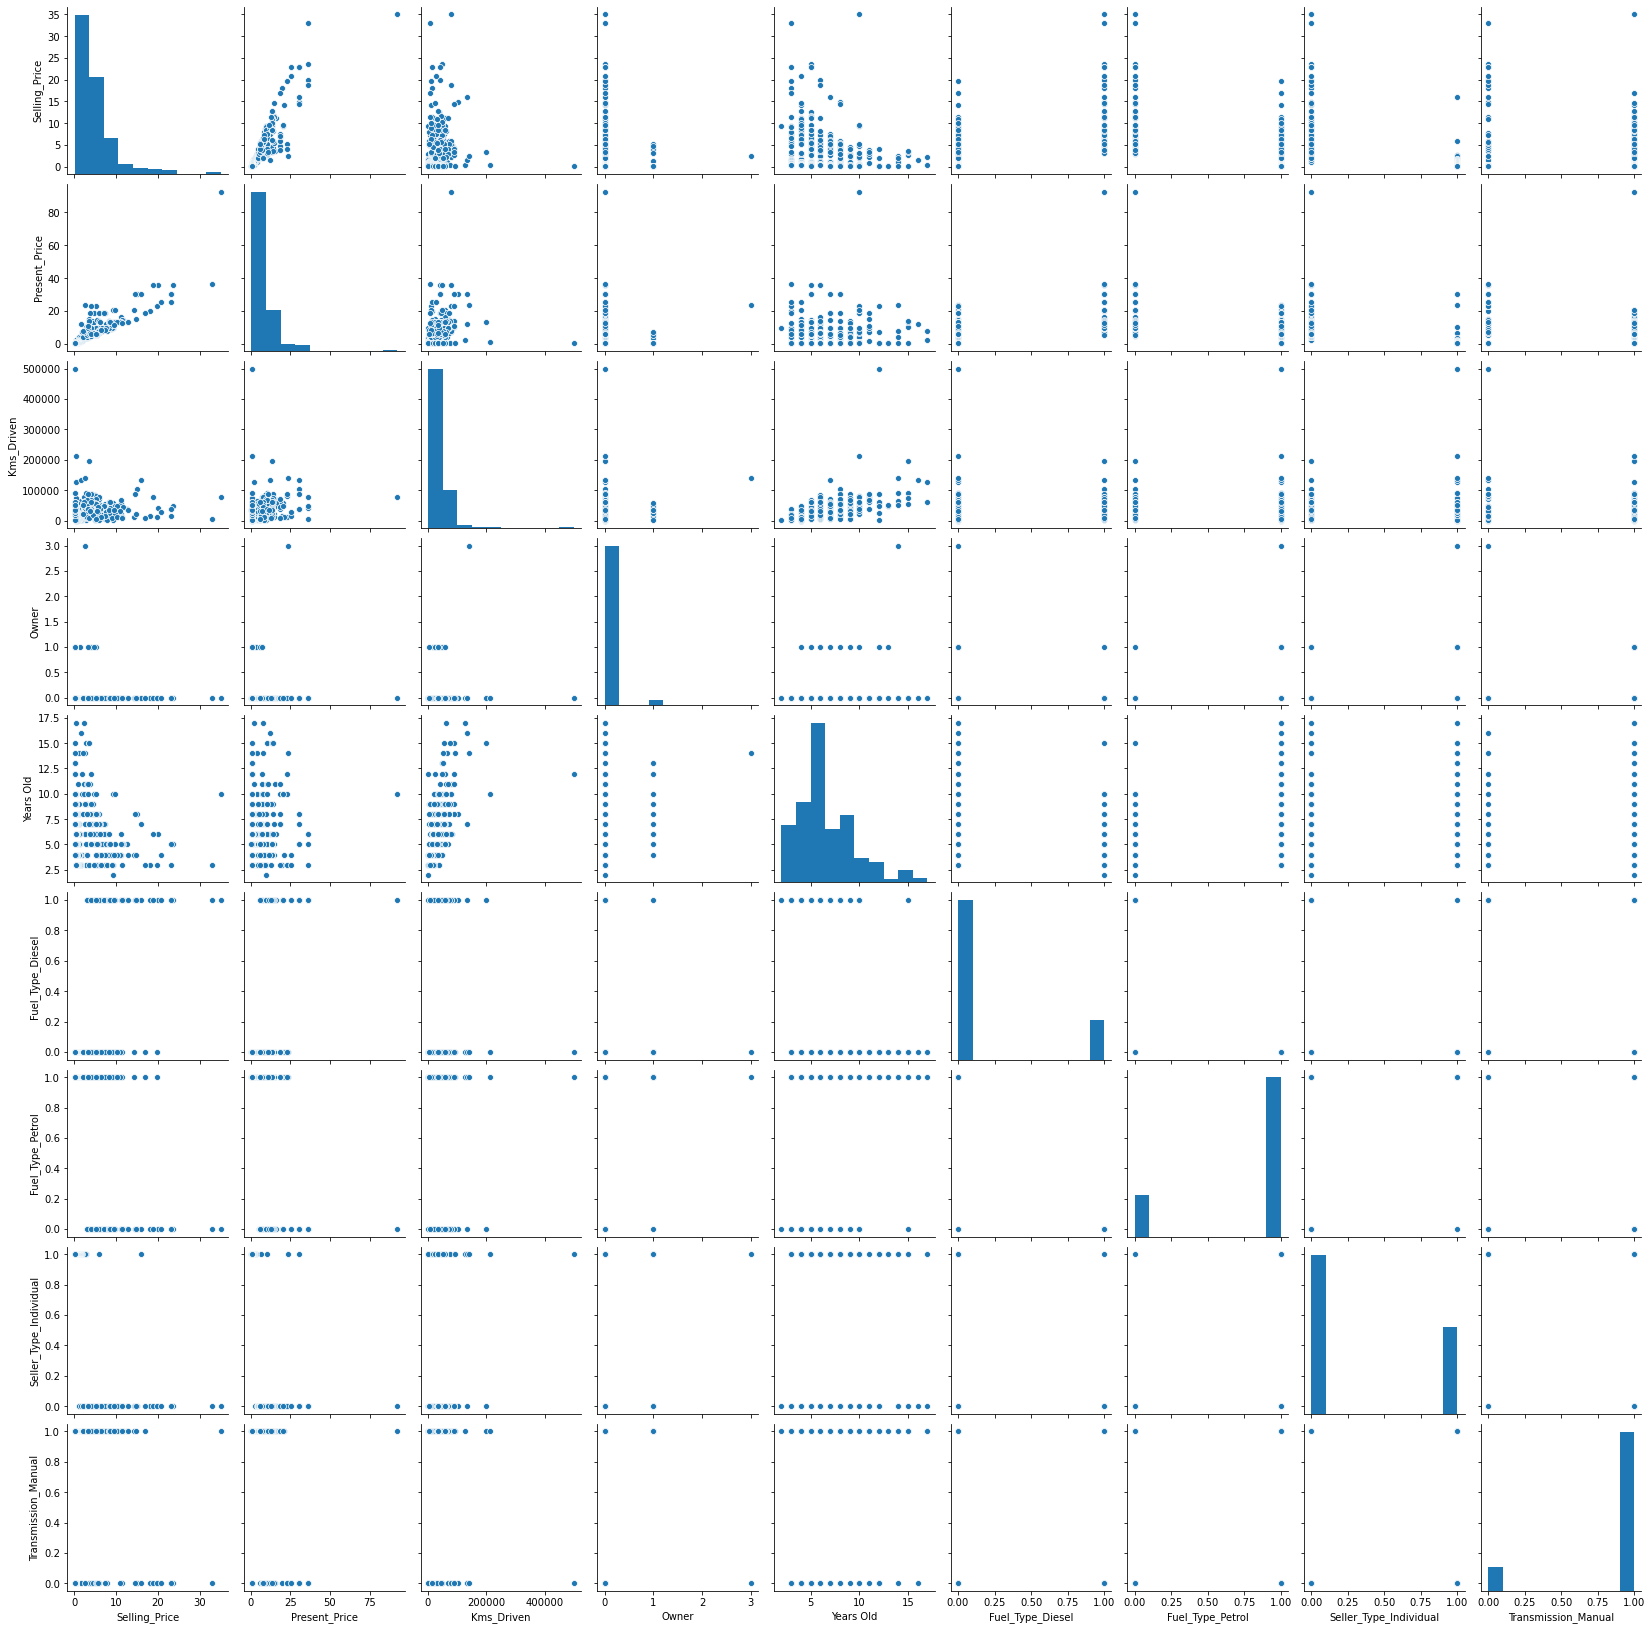

In [13]:
import seaborn as sns
sns.pairplot(data,palette="rainbow")

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline


<AxesSubplot:>

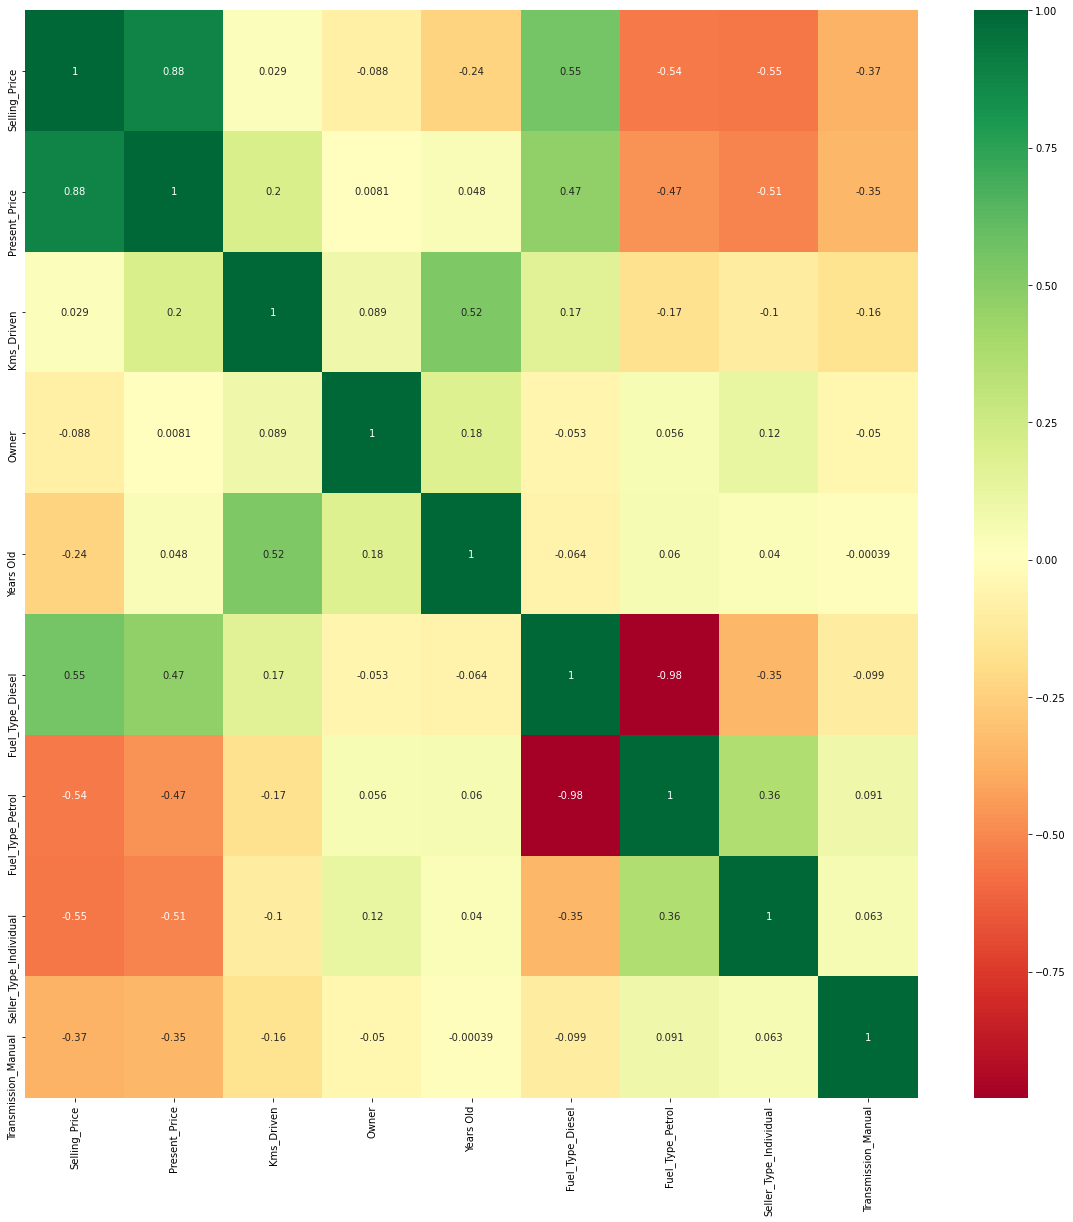

In [15]:
cormat = data.corr()
top_corr=  cormat.index
plt.figure(figsize=(20,20))

sns.heatmap(data[top_corr].corr(),annot=True,cmap = "RdYlGn")

In [16]:
data.head()
X  = data.iloc[:,1:]
y = data.iloc[:,0]



In [17]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [18]:
X.head()

,Present_Price,Kms_Driven,Owner,Years Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [19]:
# feature importance
import sklearn

In [20]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(X,y)

ExtraTreesRegressor()

In [21]:
print(etr.feature_importances_)

[0.35898216 0.04156378 0.00037206 0.07071267 0.25676843 0.00996386
 0.11166656 0.14997048]


In [22]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


<AxesSubplot:>

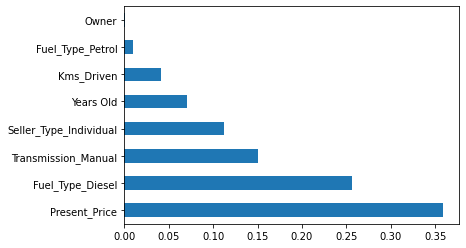

In [23]:
# feature importance graph plotting

feature_importance = pd.Series(etr.feature_importances_,index=X.columns)
feature_importance.nlargest(9).plot(kind = "barh")


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(210, 8) (210,) (91, 8) (91,)


In [26]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [27]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features = ["auto","sqrt"]
max_depth =  [int(x) for x in np.linspace(start=5,stop=6,num=12)]


min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [28]:
# random search cv is faster than grid search cv
from sklearn.model_selection import RandomizedSearchCV

In [29]:
random_grid = {
    "n_estimators" : n_estimators,
    "max_features" : max_features,
    "max_depth" : max_depth,
    "min_samples_split" : min_samples_split,
    "min_samples_leaf"   : min_samples_leaf 
}
print(random_grid)
# in key value pair

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [30]:
rscv = RandomizedSearchCV( estimator = rfr,param_distributions = random_grid,n_iter=10,scoring="neg_mean_squared_error",n_jobs=1,cv=5,verbose=2)

In [31]:
rscv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   2.2s
[CV] n_estimators=200, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=5 
[CV]  n_estimators=200, min_samples_split=15, min_samples_leaf=5, max_features=auto, max_depth=5, total=   0.4s
[CV] n_estimators=200, min_samples_split=15, 

[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=600, min_samples_split=10

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 5, 5, 5, 5, 5, 5, 5, 5,
                                                      5, 5, 6],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [32]:
y_pred = rscv.predict(X_test)
y_pred

array([ 0.43197786, 11.06680301,  5.01641518,  0.29073976,  8.35690592,
        6.46721136,  1.1067758 ,  0.54698049,  0.43197786,  5.86476172,
        7.52934456,  1.09830549,  7.98128916,  0.43370778,  5.16976153,
        2.5871862 ,  1.15958299, 12.8586867 ,  0.43254611,  1.4267297 ,
        0.30339151,  7.32423762,  5.06830607,  2.93203612,  0.54192309,
        4.41408841,  5.19395881,  3.73448243,  1.19081663,  1.17260891,
        0.46589748,  9.61393083,  0.46075189,  2.84508376,  7.47842533,
        4.70118445,  6.18367369,  6.62937121,  2.66369957,  7.31638438,
        4.50822012,  3.72486611,  4.84351113,  0.53672894,  6.29817416,
        0.82951458,  8.97394552,  5.56469465,  2.99124585,  4.40124842,
        5.14457568,  1.40931693, 22.1411264 , 19.26919153,  6.51924043,
       10.6670941 ,  5.06687983,  8.41028343,  2.92674172,  6.732318  ,
        0.29524613,  0.3034013 ,  0.60086404,  0.44791987,  4.87476495,
        1.1726486 , 22.0536514 , 20.28454591,  6.27902728,  0.45

<AxesSubplot:xlabel='Selling_Price'>

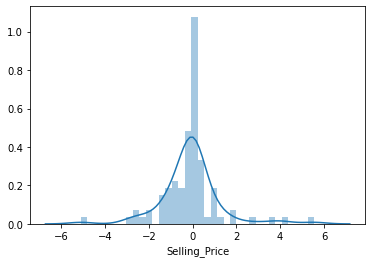

In [33]:
sns.distplot(y_test-y_pred)

In [34]:
rscv.score(X_train,y_train)

-1.1060905496249738

In [35]:
X_train.columns

Index(['Present_Price', 'Kms_Driven', 'Owner', 'Years Old', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

In [36]:
 rscv.predict([[8.8,20000,1,6,0,1,1,0]])[0]

5.914540886406823

In [37]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [38]:
data['Owner'].nunique()

3

In [39]:
X_train.head()

,Present_Price,Kms_Driven,Owner,Years Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
185,0.58,1900,0,12,0,1,1,0
72,18.61,56001,0,7,0,1,0,1
15,10.79,43000,0,4,1,0,0,1
10,3.60,2135,0,3,0,1,0,1
196,0.52,500000,0,12,0,1,1,0


In [40]:
import joblib

In [41]:
joblib.dump(rscv,"Carprediction_rfr.pkl")

['Carprediction_rfr.pkl']

In [42]:
model = joblib.load("Carprediction_rfr.pkl")

In [43]:
model.predict([[9,20000,1,6,0,1,1,0]])[0]

5.914540886406823